<a href="https://colab.research.google.com/github/jdmartinezrs/chatbotDevelopmentPython/blob/main/backendAceptable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/gunthercox/ChatterBot.git@master
!pip install chatterbot_corpus

  Cloning https://github.com/gunthercox/ChatterBot.git (to revision master) to /tmp/pip-req-build-dxtx551i
  Running command git clone --filter=blob:none --quiet https://github.com/gunthercox/ChatterBot.git /tmp/pip-req-build-dxtx551i
  Resolved https://github.com/gunthercox/ChatterBot.git to commit 1b26cd4a24848b8f1caf06b9046dfc2dee3caf98
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ChatterBot: filename=chatterbot-1.2.7-py3-none-any.whl size=76246 sha256=2472026572dd3639a0dd84a22945c66e682fae70bde9011c8f1e5241d13a2d61
  Stored in directory: /tmp/pip-ephem-wheel-cache-c9xyir5h/wheels/fd/03/55/c2af3bb3db528c97656fd03d65adc6492c0d41496bfafd3485
Successfully built ChatterBot
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.5/240.5 kB 5.0 MB/s eta 0:00:00


este es bueno

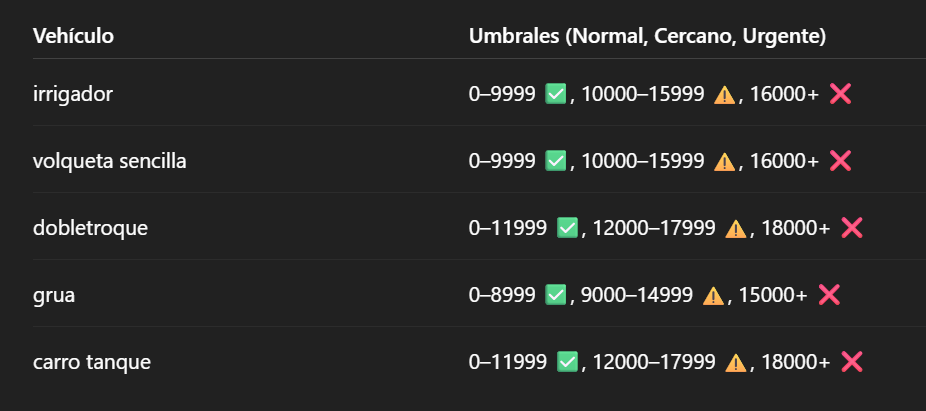

backend aceptable backend aceptable

In [32]:
from chatterbot import ChatBot
from chatterbot.trainers import ListTrainer

vehiculos = {
    "irrigador": {"base": 7000, "coeficiente": 0.15},
    "volqueta sencilla": {"base": 7500, "coeficiente": 0.17},
    "dobletroque": {"base": 6900, "coeficiente": 0.21},
    "grua": {"base": 6100, "coeficiente": 0.22},
    "carro tanque": {"base": 5800, "coeficiente": 0.25},
}

def clasificar_mantenimiento(tipo, km):
    normal, cercano, urgente = umbrales_fijos.get(tipo, (0, 10000, 16000))  # default fallback

    if km >= urgente:
        return f"❌ {tipo.upper()} necesita mantenimiento urgente"
    elif km >= cercano:
        return f"⚠️ {tipo.upper()} pronto requiere mantenimiento"
    else:
        return f"✅ {tipo.upper()} operando normalmente"

# Crear y entrenar el chatbot
bot = ChatBot("MantenimientoBot")
trainer = ListTrainer(bot)
trainer.train([
    "Hola", "Hola, ¿qué vehículo deseas revisar?",
    'me gustaria revisar mi vehiculo',"¿qué vehículo tienes?",
    "me gustaria revisar otro vehiculo","¿qué deseas revisar?",
    "otro", '¿qué vehículo deseas revisar?',
    "Buenos días","Hola, ¿qué vehículo deseas revisar?",
    "Buenas tardes", "Hola, ¿qué vehículo deseas revisar?",
    "¿Qué sabes hacer?", "Puedo decirte cuándo darle mantenimiento a tu vehículo.",
    "¿Para qué sirves?", "Puedo decirte cuándo darle mantenimiento a tu vehículo.",
    'okey', "Hola, ¿qué vehículo deseas revisar?",
    "Chao", "¡Hasta luego! 🚚",
    "Adiós", "¡Hasta luego! 🚚"
])

# Flujo principal del chatbot
def ejecutar_chatbot():
    print("MantenimientoBot 🤖: ¡Hola! Soy tu asistente de mantenimiento de vehículos.")
    tipos = list(vehiculos.keys())

    while True:
        entrada = input("Tú: ").strip().lower()

        if entrada in ["salir", "chao", "adiós"]:
            print("MantenimientoBot 🤖: ¡Hasta luego! 🚚")
            break

        match = [tipo for tipo in tipos if tipo in entrada]
        if match:
            tipo = match[0]
            datos = vehiculos[tipo]

            try:
                km = int(input(f"MantenimientoBot 🤖: ¿Cuántos km ha recorrido el {tipo.upper()}? ").strip())
                if km < 0 or km > 25000:
                    print("MantenimientoBot 🤖: Por favor ingresa un valor entre 0 y 25000 km.")
                    continue

                base = datos["base"]
                coef = datos["coeficiente"]
                restante = max(0, round(base - km * coef))

                print(f"MantenimientoBot 🤖: Le quedan {restante} km antes del mantenimiento.")
                print(f"MantenimientoBot 🤖: {clasificar_mantenimiento(tipo, km)}")

            except ValueError:
                print("MantenimientoBot 🤖: Por favor ingresa un número válido de km.")
        else:
            respuesta = bot.get_response(entrada)
            print("MantenimientoBot 🤖:", respuesta)

# Ejecutar el chatbot
ejecutar_chatbot()


List Trainer: 22it [00:00, 544.48it/s]


MantenimientoBot 🤖: ¡Hola! Soy tu asistente de mantenimiento de vehículos.
Tú: me gustaria revisar mi vehiculo
MantenimientoBot 🤖: Hola, ¿qué vehículo tienes?
Tú: grua
MantenimientoBot 🤖: ¿Cuántos km ha recorrido el GRUA? 12000
MantenimientoBot 🤖: Le quedan 3460 km antes del mantenimiento.
MantenimientoBot 🤖: ⚠️ GRUA pronto requiere mantenimiento
Tú: me gustaria revisar otro vehiculo
MantenimientoBot 🤖: ¿qué deseas revisar?
Tú: dobletroque
MantenimientoBot 🤖: ¿Cuántos km ha recorrido el DOBLETROQUE? 11000
MantenimientoBot 🤖: Le quedan 4590 km antes del mantenimiento.
MantenimientoBot 🤖: ✅ DOBLETROQUE operando normalmente
Tú: otro
MantenimientoBot 🤖: ¿qué vehículo deseas revisar?
Tú: grua
MantenimientoBot 🤖: ¿Cuántos km ha recorrido el GRUA? 8000
MantenimientoBot 🤖: Le quedan 4340 km antes del mantenimiento.
MantenimientoBot 🤖: ✅ GRUA operando normalmente
Tú: chao
MantenimientoBot 🤖: ¡Hasta luego! 🚚


In [ ]:
normal, cercano, urgente = umbrales_fijos.get(tipo, (0, 10000, 16000))

umbrales_fijos = {
    "irrigador": (0, 10000, 16000),
    "volqueta sencilla": (0, 10000, 16000),
    "dobletroque": (0, 12000, 18000),
    "grua": (0, 9000, 15000),
    "carro tanque": (0, 12000, 18000),
}